<a href="https://colab.research.google.com/github/ChotirosRR/cs352-264-s0267/blob/main/6209610267_CS352_final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go



In [ ]:
bucket = 'ggplaystore/dataset'
data_key = 'train.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

data = pd.read_csv(data_location)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
remove = ['+','$',',','M','k']
col_remove = ['Installs','Price','Reviews','Size']
for col in col_remove :
    for re in remove:
        data[col] = data[col].apply(lambda x : x.replace(re , ''))
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5821,Clash of Axe: Flippy Lumberjack Action X,GAME,4.3,6,61,1000,Free,0,Everyone,Action,"September 14, 2017",1.2,4.0 and up
3606,Listen to the story~The Story of the Fairy Tales,PARENTING,4.7,69,5.8,5000,Free,0,Everyone,Parenting,"July 10, 2018",1.0.6,4.0.3 and up
8079,Ambient CX,BUSINESS,NaN,0,7.5,5,Free,0,Everyone,Business,"May 9, 2017",1.0,2.3.3 and up
3813,"AOL - News, Mail & Video",NEWS_AND_MAGAZINES,4.1,62465,Varies with device,5000000,Free,0,Everyone 10+,News & Magazines,"August 2, 2018",Varies with device,Varies with device
3093,NASCAR MOBILE,SPORTS,4.2,80900,21,1000000,Free,0,Everyone,Sports,"July 25, 2018",7.1.7.4,4.4 and up


In [ ]:
remove2 = ['Varies with device']
col_remove2 = ['Size']
for col in col_remove2 :
    for re in remove2:
        data[col] = data[col].apply(lambda x : x.replace(re , '0'))
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10524,FK (FlightKid),GAME,NaN,2,22,10,Free,0,Everyone,Action,"March 3, 2016",1.0,4.0 and up
5737,Add Watermark Free,PHOTOGRAPHY,4.3,18325,0,1000000,Free,0,Everyone,Photography,"September 3, 2017",Varies with device,Varies with device
2063,DisneyNOW – TV Shows & Games,FAMILY,4.3,82471,0,5000000,Free,0,Everyone,Entertainment;Music & Video,"July 5, 2018",Varies with device,4.4 and up
888,IMDb Movies & TV,ENTERTAINMENT,4.2,501498,12,100000000,Free,0,Teen,Entertainment,"July 26, 2018",Varies with device,Varies with device
3344,Solo Locker (DIY Locker),TOOLS,4.5,474439,7.9,10000000,Free,0,Everyone,Tools,"June 26, 2018",6.1.7.5,4.2 and up


In [ ]:
remove2 = ['Free','Everyone']
col_remove2 = ['Installs','Price']
for col in col_remove2 :
    for re in remove2:
        data[col] = data[col].apply(lambda x : x.replace(re , '0'))
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5625,Rivals at War: 2084,FAMILY,4.0,174127,48,5000000,Free,0,Teen,Simulation,"October 3, 2016",1.3,3.0 and up
1355,Fertility Friend Ovulation App,HEALTH_AND_FITNESS,4.5,12955,7.2,1000000,Free,0,Teen,Health & Fitness,"June 27, 2018",10.24,4.4 and up
6067,Top Eleven 2018 - Be a Soccer Manager,SPORTS,4.4,3451011,0,50000000,Free,0,Everyone,Sports,"July 26, 2018",7.4,4.1 and up
8218,DB Manager,PRODUCTIVITY,NaN,3,108,1000,Free,0,Everyone,Productivity,"January 21, 2014",2.0.0,3.1 and up
10257,Chelsea FC Official Keyboard,PRODUCTIVITY,4.5,91397,14,1000000,Free,0,Everyone,Productivity,"July 3, 2018",3.4.4,5.0 and up


In [ ]:
data['Reviews'] = data['Reviews'].astype(float)
data['Size'] = data['Size'].astype(float)
data['Reviews'] = data['Reviews'].astype(float)
data['Installs'] = data['Installs'].astype(float)
data['Price'] = data['Price'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [ ]:
pd.isnull(data).sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
ndf = data.dropna()
pd.isnull(ndf).sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df = ndf.drop_duplicates('App')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8190.000000,8.190000e+03,8190.000000,8.190000e+03,8190.000000
mean,4.173321,2.554354e+05,32.084164,9.171613e+06,1.038342
std,0.536691,1.986309e+06,91.137317,5.827170e+07,16.864040
min,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,3.300000,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,11.000000,1.000000e+05,0.000000
75%,4.500000,4.391425e+04,30.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,994.000000,1.000000e+09,400.000000


In [ ]:
df['Category'] = df['Category'].apply(lambda c : c.lower())

for c in df['Category'].unique():
    print(c)

art_and_design
auto_and_vehicles
beauty
books_and_reference
business
comics
communication
dating
education
entertainment
events
finance
food_and_drink
health_and_fitness
house_and_home
libraries_and_demo
lifestyle
game
family
medical
social
shopping
photography
sports
travel_and_local
tools
personalization
productivity
parenting
weather
video_players
news_and_magazines
maps_and_navigation


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='count', ylabel='Category'>

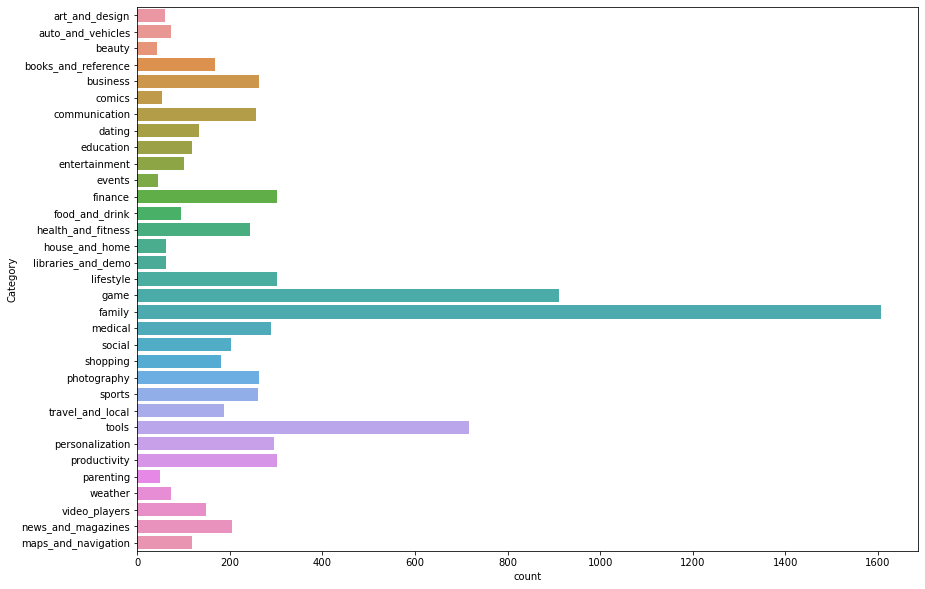

In [ ]:
f,ax= plt.subplots(figsize=(14,10))
sns.countplot(y='Category',data=df)

<AxesSubplot:xlabel='count', ylabel='Rating'>

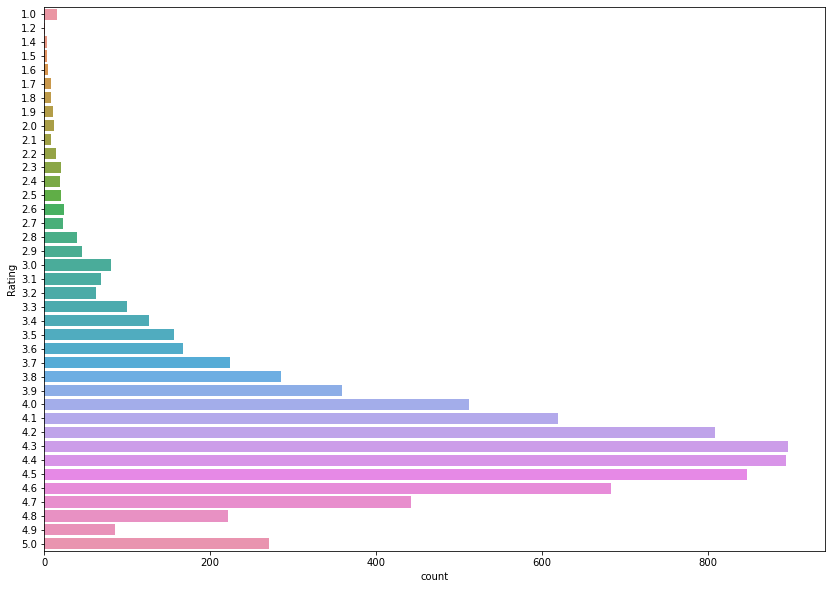

In [ ]:
f,ax= plt.subplots(figsize=(14,10))
sns.countplot(y='Rating',data=df)

<AxesSubplot:xlabel='Type', ylabel='count'>

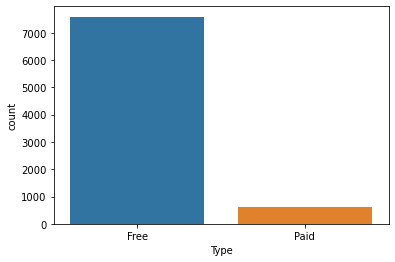

In [ ]:
sns.countplot(x='Type',data=df)

In [ ]:
df_free = df[df['Type'] == "Free"].sort_values(by = ['Installs', 'Reviews','Rating'], ascending = False).head(10)
df_free

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,social,4.1,78158306.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,communication,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,social,4.5,66577313.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,communication,4.0,56642847.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1654,Subway Surfers,game,4.5,27722264.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3665,YouTube,video_players,4.3,25655305.0,0.0,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
2808,Google Photos,photography,4.5,10858556.0,0.0,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,communication,4.1,10484169.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,communication,4.3,9642995.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3117,Maps - Navigate & Explore,travel_and_local,4.3,9235155.0,0.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



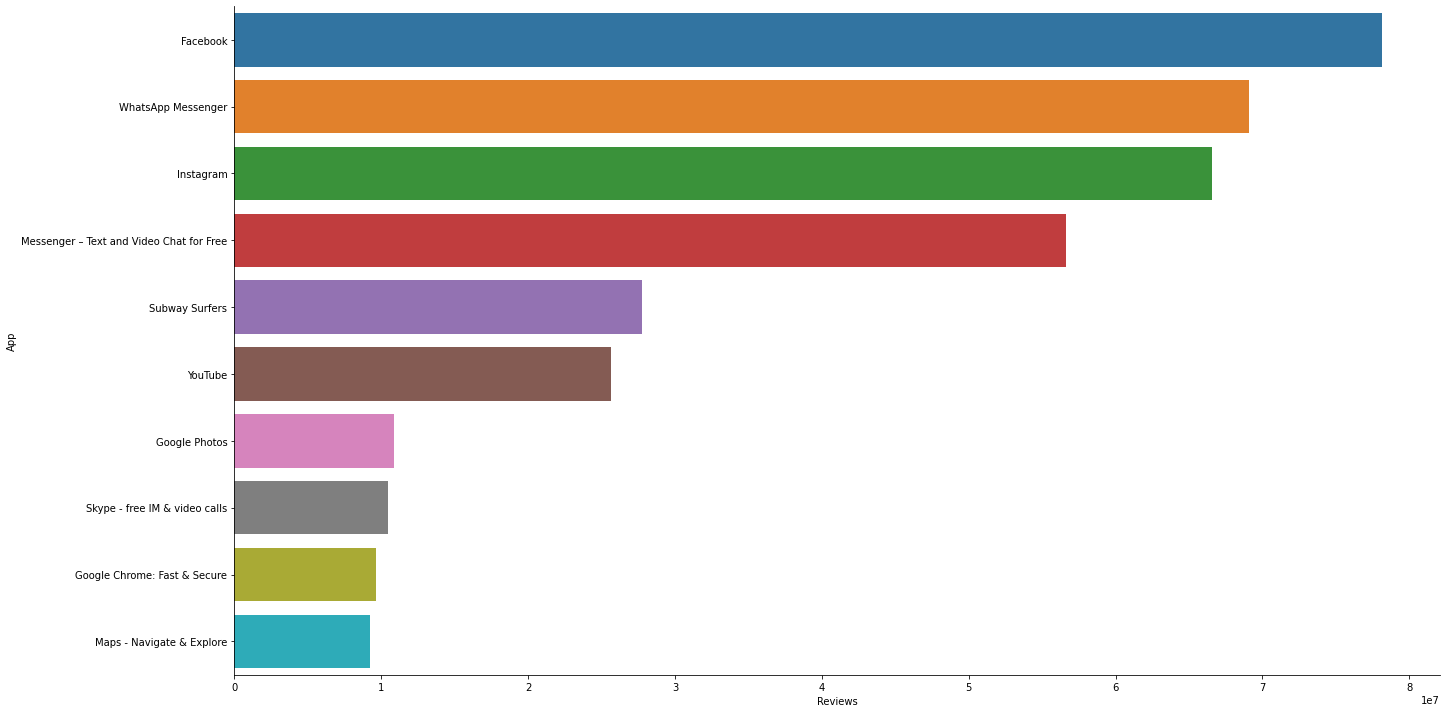

In [ ]:
sns.factorplot(x="Reviews", y="App", data = df_free.sort_values('Reviews', ascending=False).iloc[0:15], kind = 'bar', size=10, aspect=2.0)

In [ ]:
df_Paid = df[df['Type'] == "Paid"].sort_values(by = ['Installs', 'Reviews','Rating'], ascending = False).head(10)
df_Paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2241,Minecraft,family,4.5,2376564.0,0.0,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
4034,Hitman Sniper,game,4.6,408292.0,29.0,10000000.0,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
7417,Grand Theft Auto: San Andreas,game,4.4,348962.0,26.0,1000000.0,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up
8860,Bloons TD 5,family,4.6,190086.0,94.0,1000000.0,Paid,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up
9678,Where's My Water?,family,4.7,188740.0,69.0,1000000.0,Paid,1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up
2242,Card Wars - Adventure Time,family,4.3,129603.0,23.0,1000000.0,Paid,2.99,Everyone 10+,Card;Action & Adventure,"February 11, 2016",1.11.0,2.3.3 and up
5490,True Skate,sports,4.4,129409.0,73.0,1000000.0,Paid,1.99,Everyone,Sports,"August 4, 2018",1.5.1,4.0.3 and up
5631,Five Nights at Freddy's,game,4.6,100805.0,50.0,1000000.0,Paid,2.99,Teen,Action,"December 2, 2014",1.85,2.3 and up
3403,Beautiful Widgets Pro,personalization,4.2,97890.0,14.0,1000000.0,Paid,2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up
8804,DraStic DS Emulator,game,4.6,87766.0,12.0,1000000.0,Paid,4.99,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



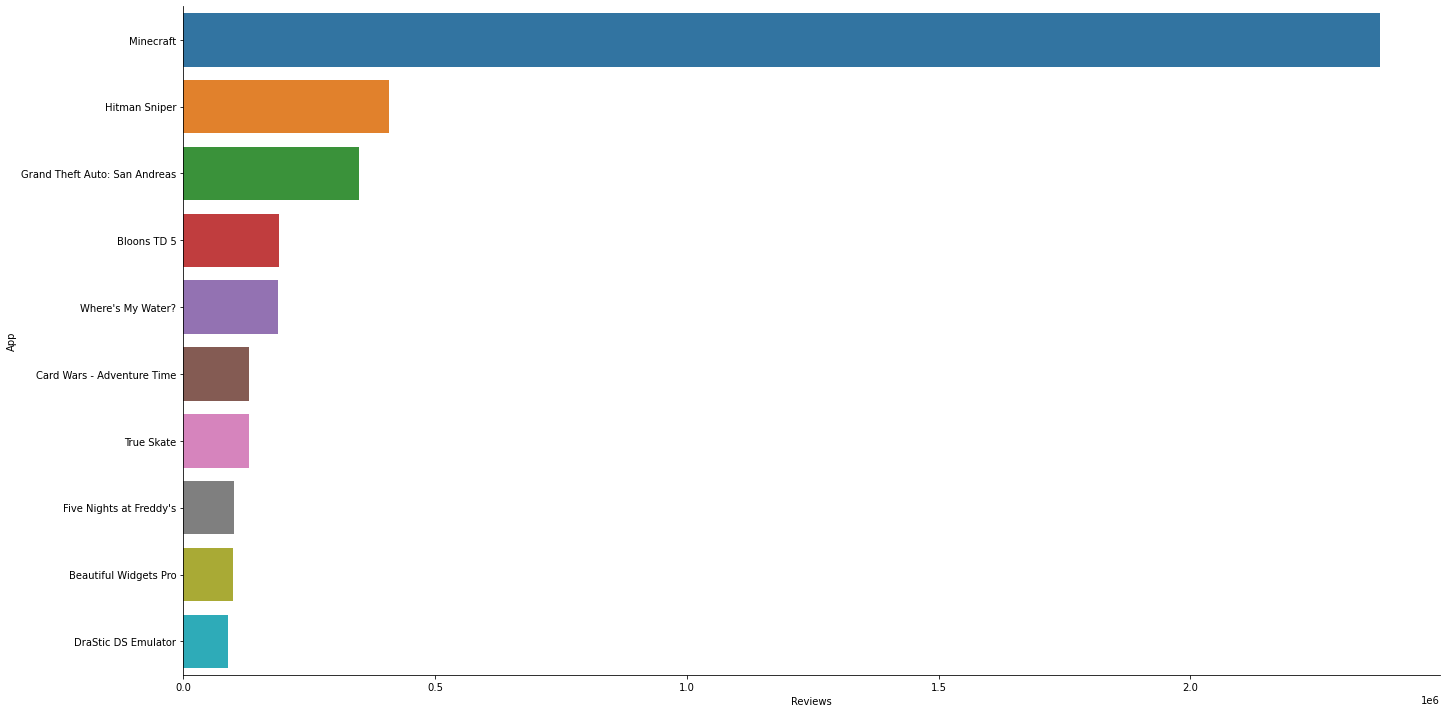

In [ ]:
sns.factorplot(x="Reviews", y="App", data = df_Paid.sort_values('Reviews', ascending=False).iloc[0:15], kind = 'bar', size=10, aspect=2.0)

In [ ]:
df['Installs'].max()

1000000000.0

In [ ]:
top20_df = df[df['Installs'] == 1000000000.0 ].sort_values(by=['Reviews','Rating'] , ascending = False).head(20)
top20_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,social,4.1,78158306.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,communication,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,social,4.5,66577313.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,communication,4.0,56642847.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1654,Subway Surfers,game,4.5,27722264.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3665,YouTube,video_players,4.3,25655305.0,0.0,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
2808,Google Photos,photography,4.5,10858556.0,0.0,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,communication,4.1,10484169.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,communication,4.3,9642995.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3117,Maps - Navigate & Explore,travel_and_local,4.3,9235155.0,0.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device


<AxesSubplot:xlabel='count', ylabel='Category'>

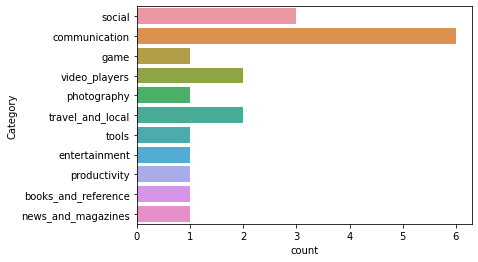

In [ ]:
#จำนวนประเภทของแอพพลิเคชันที่ได้รับการดาวน์โหลดมากสุด20อันดับ โดยใช้ Rating and review เข้ามาจัดอันดับด้วย
top20_df = df[df['Installs'] == 1000000000.0 ].sort_values(by=['Reviews','Rating'] , ascending = False).head(20)
sns.countplot(y='Category',data=top20_df)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



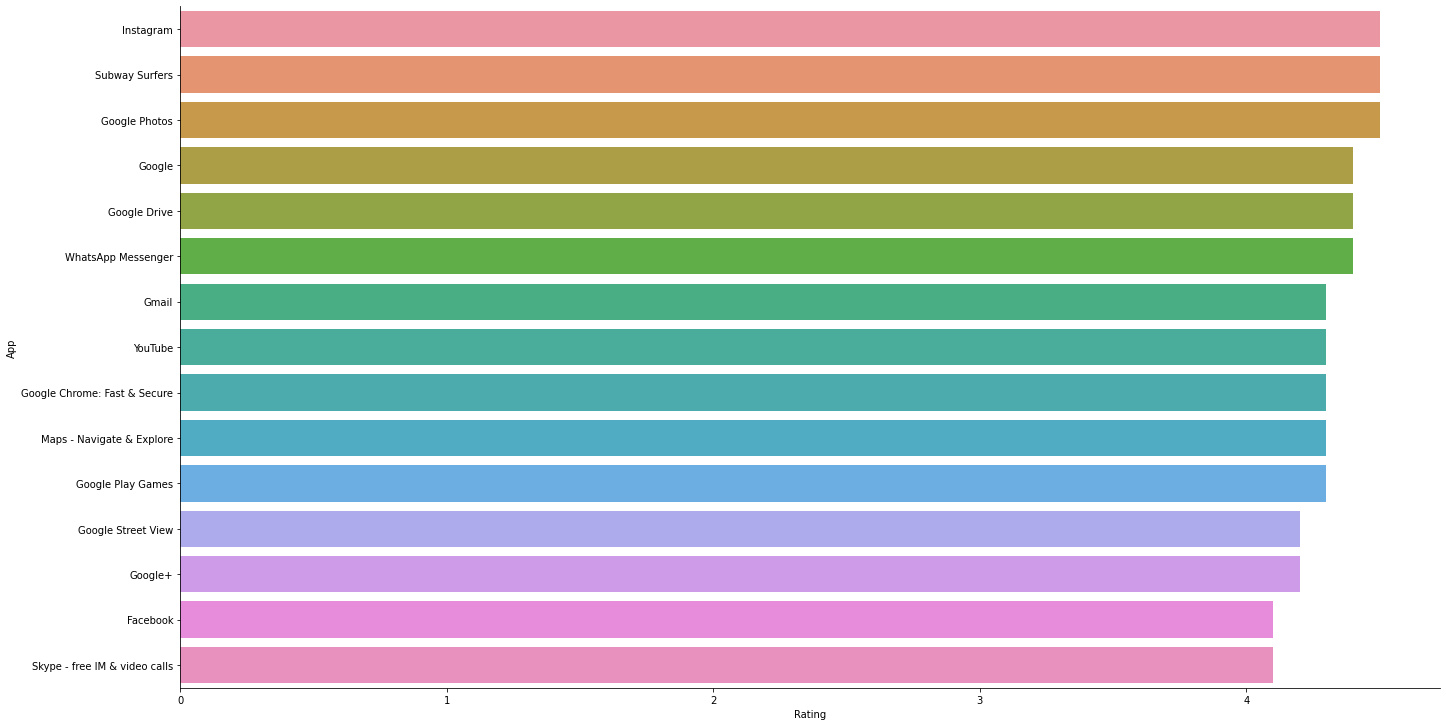

In [ ]:
sns.factorplot(x="Rating", y="App", data = top20_df.sort_values('Rating', ascending=False).iloc[0:15], kind = 'bar', size=10, aspect=2.0)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



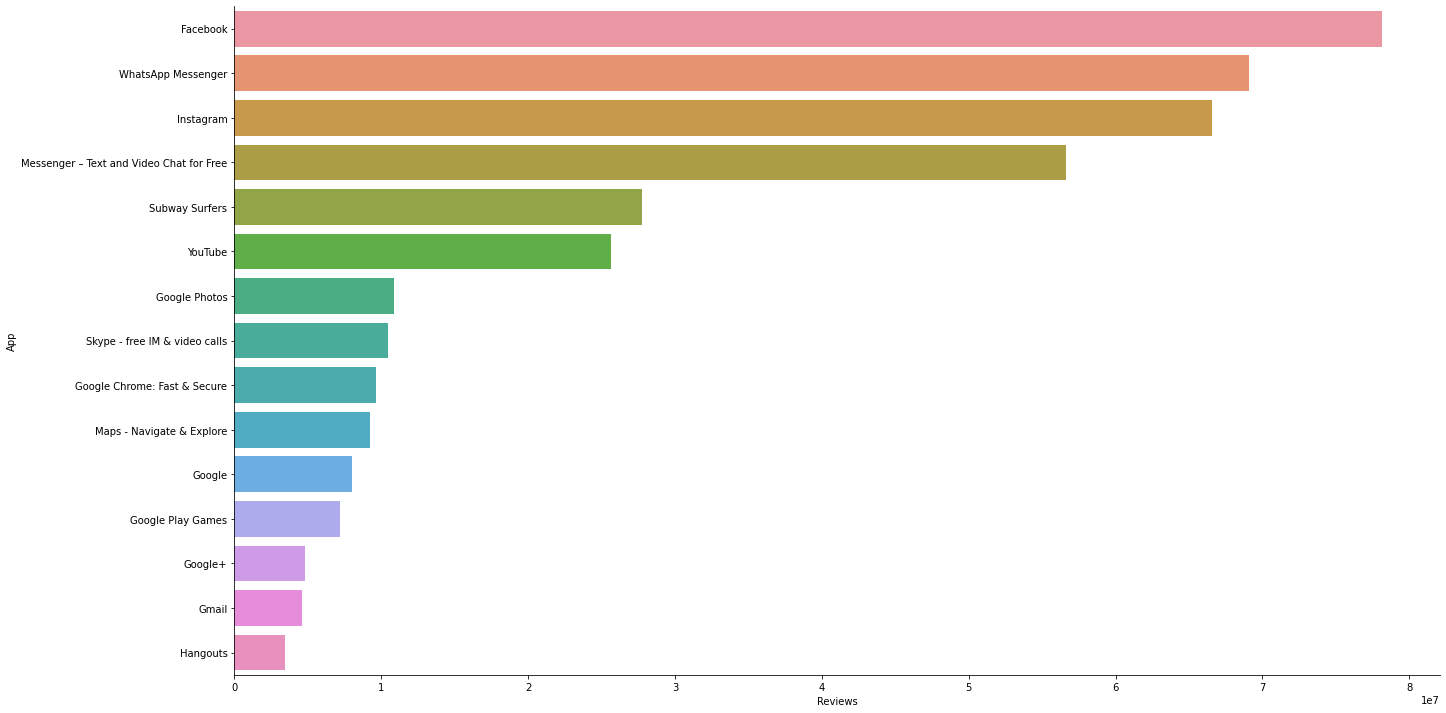

In [ ]:
sns.factorplot(x="Reviews", y="App", data = top20_df.sort_values('Reviews', ascending=False).iloc[0:15], kind = 'bar', size=10, aspect=2.0)

<AxesSubplot:ylabel='App'>

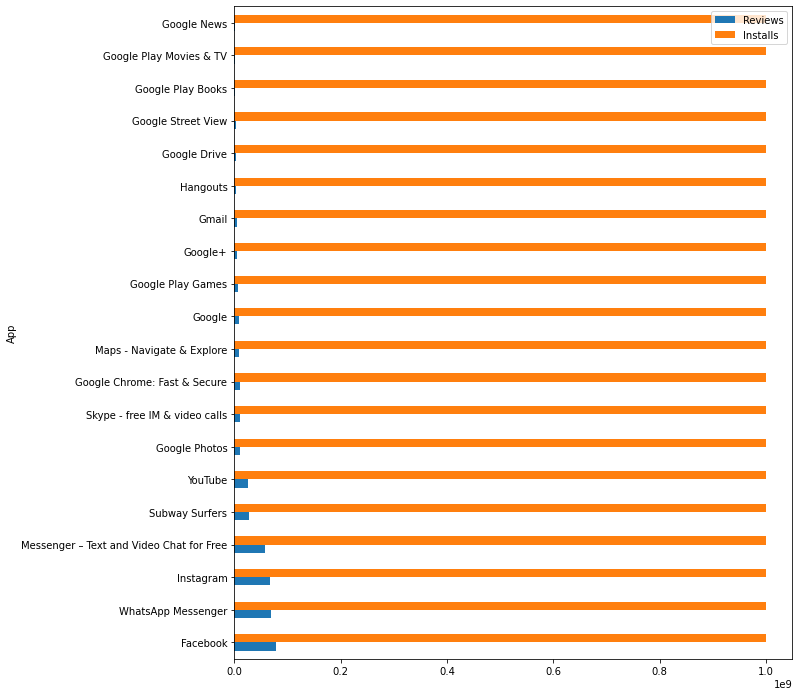

In [ ]:
top20_df.plot(x="App", y=["Reviews","Installs"],
        kind="barh",figsize=(10, 12))

In [ ]:
x = pd.pivot_table(index='Category' , columns = 'Installs', values = 'Rating', data = df , aggfunc = np.mean)
x

Installs,1.000000e+00,5.000000e+00,1.000000e+01,5.000000e+01,1.000000e+02,5.000000e+02,1.000000e+03,5.000000e+03,1.000000e+04,5.000000e+04,1.000000e+05,5.000000e+05,1.000000e+06,5.000000e+06,1.000000e+07,5.000000e+07,1.000000e+08,5.000000e+08,1.000000e+09
Category,,,,,,,,,,,,,,,,,,,
art_and_design,NaN,NaN,NaN,NaN,5.000000,NaN,4.366667,4.766667,4.445455,4.333333,4.211111,4.450000,4.325000,4.366667,4.475000,4.500000,NaN,NaN,NaN
auto_and_vehicles,NaN,NaN,NaN,NaN,3.500000,4.600000,3.800000,2.800000,4.333333,4.300000,4.291304,4.160000,4.361538,4.433333,4.300000,NaN,NaN,NaN,NaN
beauty,NaN,NaN,NaN,NaN,4.000000,NaN,4.000000,4.266667,4.300000,4.475000,4.333333,4.200000,4.287500,4.500000,4.000000,NaN,NaN,NaN,NaN
books_and_reference,NaN,5.0,NaN,5.000000,5.000000,4.533333,4.304000,4.033333,4.258333,4.418182,4.426316,4.337500,4.375000,4.322222,4.473684,NaN,4.500000,NaN,3.900000
business,NaN,5.0,4.283333,4.533333,4.433333,3.900000,4.028205,4.100000,3.760000,3.800000,4.189655,4.100000,4.214706,4.193333,4.323077,4.140000,4.300000,NaN,NaN
comics,NaN,NaN,NaN,NaN,2.800000,NaN,5.000000,4.125000,4.309091,4.166667,4.110000,4.180000,4.218182,4.050000,4.500000,NaN,NaN,NaN,NaN
communication,NaN,NaN,4.600000,5.000000,4.035714,4.083333,3.841667,4.123529,3.741667,3.980000,3.910526,4.100000,4.156098,4.222727,4.251163,4.371429,4.350000,4.380,4.183333
dating,NaN,NaN,1.000000,NaN,4.244444,4.257143,3.950000,4.225000,4.052381,3.860000,3.658333,3.927778,4.047368,4.116667,4.137500,NaN,NaN,NaN,NaN
education,NaN,NaN,NaN,NaN,NaN,NaN,4.800000,NaN,4.120000,4.083333,4.255000,4.361538,4.415909,4.428571,4.423077,NaN,4.700000,NaN,NaN


<AxesSubplot:xlabel='Installs', ylabel='Category'>

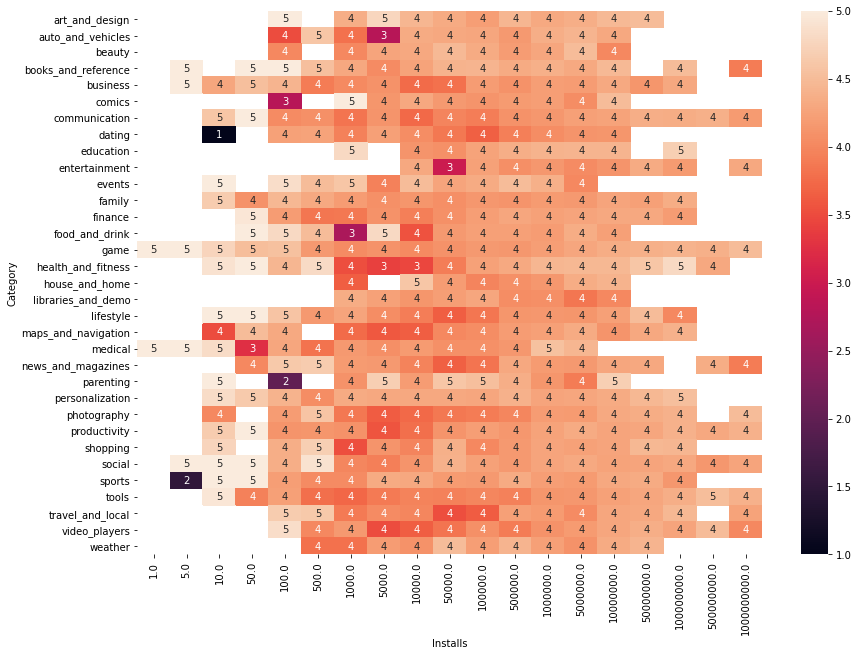

In [ ]:
f,ax= plt.subplots(figsize=(14,10))
sns.heatmap(x, annot = True, fmt = '0.0f')

In [ ]:
df_fam = df[df.Category == 'family'].sort_values(['Installs','Reviews','Rating'], ascending = False)
df_fam

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3975,Hay Day,family,4.5,10053186.0,94.0,100000000.0,Free,0.00,Everyone,Casual,"June 28, 2018",1_39_93,4.0.3 and up
4111,Talking Tom Cat 2,family,4.3,3213548.0,55.0,100000000.0,Free,0.00,Everyone 10+,Entertainment,"July 25, 2018",5.3.5.16,4.1 and up
6849,Bubble Witch 2 Saga,family,4.3,2838064.0,0.0,100000000.0,Free,0.00,Everyone,Casual,"August 6, 2018",Varies with device,Varies with device
6269,Bitmoji – Your Personal Emoji,family,4.6,2312084.0,0.0,100000000.0,Free,0.00,Teen,Entertainment,"July 25, 2018",Varies with device,4.3 and up
4247,Talking Tom Cat,family,4.3,1838090.0,0.0,100000000.0,Free,0.00,Everyone 10+,Casual,"July 27, 2018",Varies with device,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,CB Register,family,5.0,1.0,5.6,10.0,Free,0.00,Everyone,Entertainment,"June 27, 2018",1.0,4.1 and up
7477,USMLE Step 2 CK Flashcards,family,5.0,1.0,40.0,10.0,Paid,19.99,Everyone,Education,"May 26, 2014",2.47,2.2 and up
8018,30WPM Amateur ham radio Koch CW Morse code tra...,family,5.0,1.0,3.7,10.0,Paid,1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up
8596,DN Employee,family,5.0,1.0,3.8,10.0,Free,0.00,Everyone,Education,"June 25, 2018",1.4,4.4 and up


<AxesSubplot:xlabel='count', ylabel='Rating'>

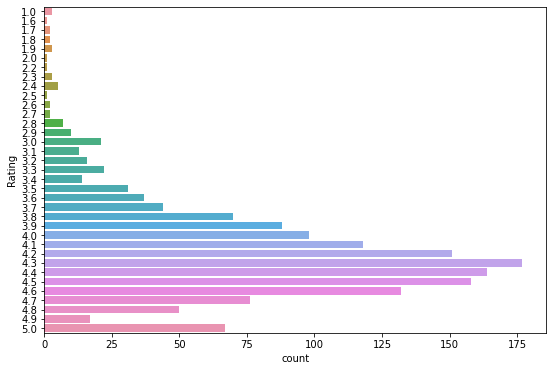

In [ ]:
f,ax= plt.subplots(figsize=(9,6))
sns.countplot(y='Rating',data=df_fam)

<AxesSubplot:xlabel='count', ylabel='Installs'>

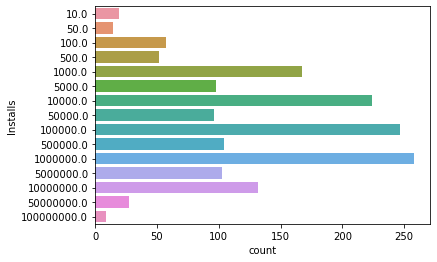

In [ ]:
sns.countplot(y='Installs',data=df_fam)

<AxesSubplot:xlabel='Type', ylabel='count'>

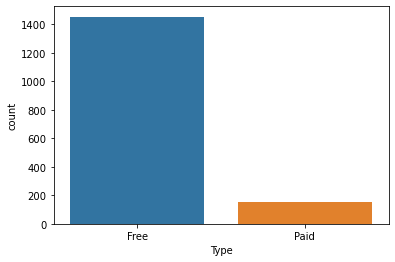

In [ ]:
sns.countplot(x='Type',data=df_fam)

In [ ]:
top10_df_fam = df_fam.head(10)
top10_df_fam

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3975,Hay Day,family,4.5,10053186.0,94.0,100000000.0,Free,0.0,Everyone,Casual,"June 28, 2018",1_39_93,4.0.3 and up
4111,Talking Tom Cat 2,family,4.3,3213548.0,55.0,100000000.0,Free,0.0,Everyone 10+,Entertainment,"July 25, 2018",5.3.5.16,4.1 and up
6849,Bubble Witch 2 Saga,family,4.3,2838064.0,0.0,100000000.0,Free,0.0,Everyone,Casual,"August 6, 2018",Varies with device,Varies with device
6269,Bitmoji – Your Personal Emoji,family,4.6,2312084.0,0.0,100000000.0,Free,0.0,Teen,Entertainment,"July 25, 2018",Varies with device,4.3 and up
4247,Talking Tom Cat,family,4.3,1838090.0,0.0,100000000.0,Free,0.0,Everyone 10+,Casual,"July 27, 2018",Varies with device,4.1 and up
4217,Talking Ginger,family,4.2,1752017.0,52.0,100000000.0,Free,0.0,Everyone,Entertainment,"July 5, 2018",2.5.6.11,4.1 and up
4229,Where's My Water? Free,family,4.4,1372013.0,57.0,100000000.0,Free,0.0,Everyone,Puzzle;Brain Games,"November 21, 2017",1.10.0,4.1 and up
4797,Talking Tom & Ben News,family,4.4,1131937.0,41.0,100000000.0,Free,0.0,Everyone,Entertainment,"April 30, 2018",2.4.0.7,4.1 and up
4329,Tom Loves Angela,family,4.1,1111915.0,50.0,100000000.0,Free,0.0,Everyone,Entertainment,"April 30, 2018",2.2.1.3,4.1 and up
6551,Boom Beach,family,4.5,5591653.0,95.0,50000000.0,Free,0.0,Everyone 10+,Strategy,"July 18, 2018",35.119,4.0.3 and up


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



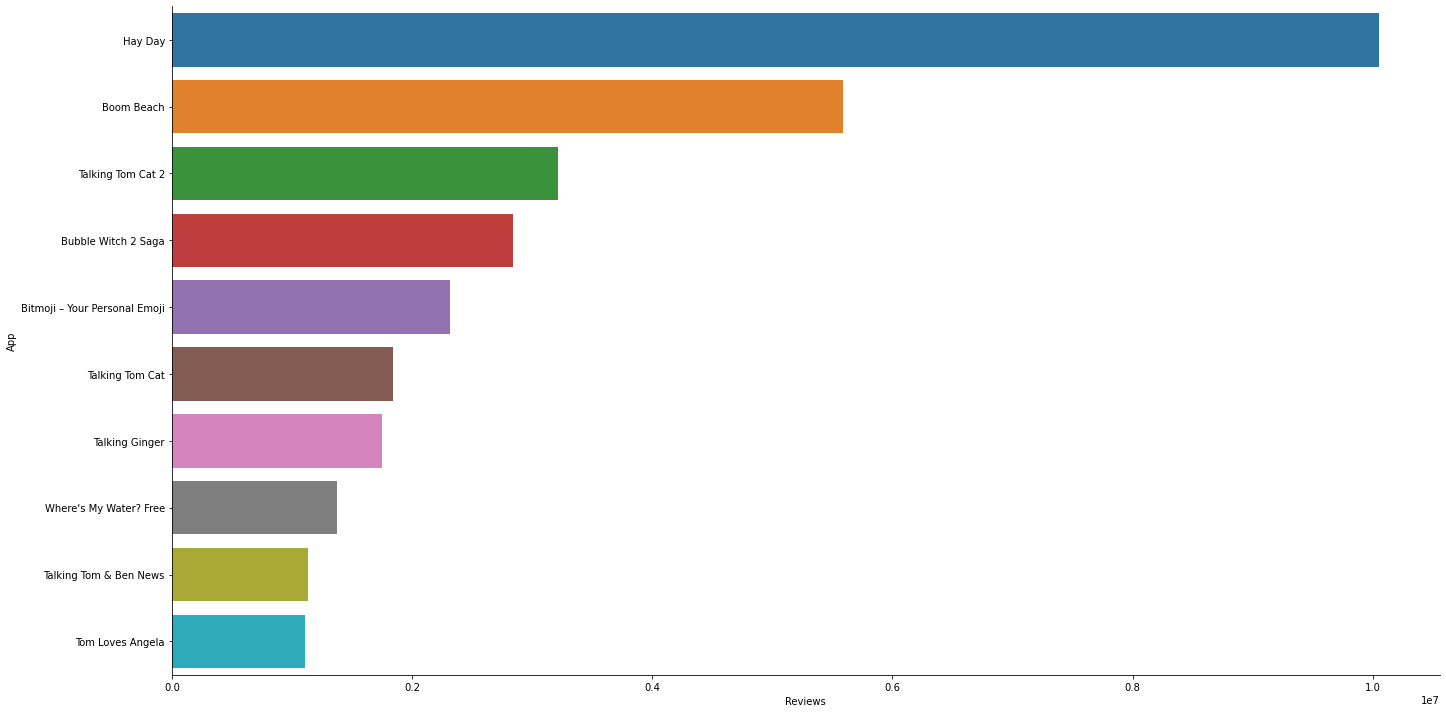

In [ ]:
sns.factorplot(x="Reviews", y="App", data = top10_df_fam.sort_values('Reviews', ascending=False).iloc[0:15], kind = 'bar', size=10, aspect=2.0)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



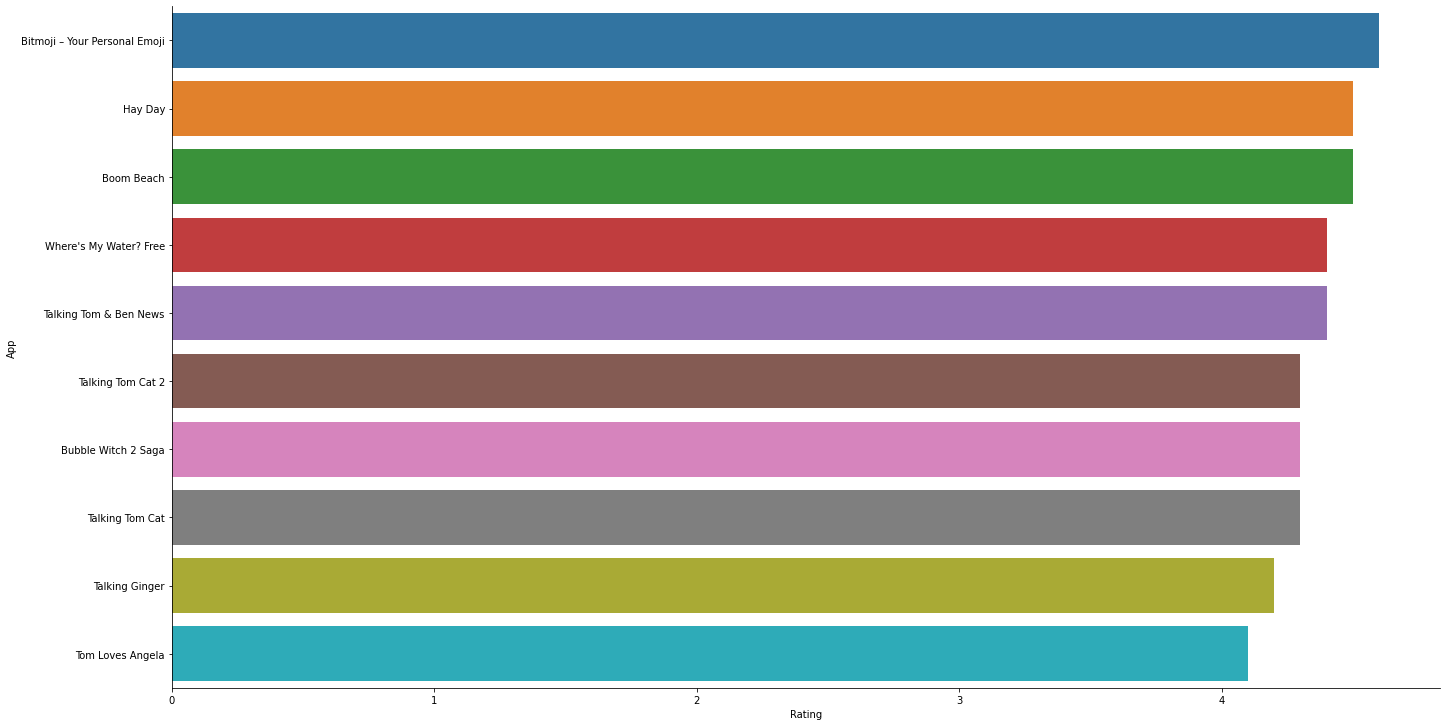

In [ ]:
sns.factorplot(x="Rating", y="App", data = top10_df_fam.sort_values('Rating', ascending=False).iloc[0:15], kind = 'bar', size=10, aspect=2.0)